In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print("Dataset shape:", X.shape)
print("Number of features:", len(feature_names))
print("Class distribution:", {0: (y == 0).sum(), 1: (y == 1).sum()})

Dataset shape: (569, 30)
Number of features: 30
Class distribution: {0: 212, 1: 357}


In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean after standardization:", np.mean(X_scaled, axis=0).round(2)[:5], "...")

Mean after standardization: [-0. -0. -0. -0.  0.] ...


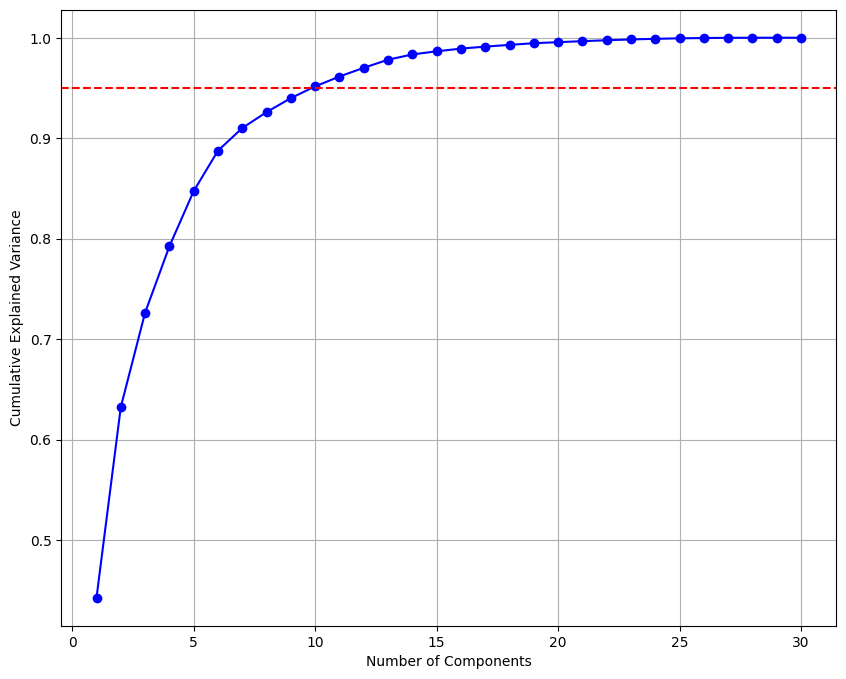

In [5]:
# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [6]:
# Determine optimal components
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Components for 95% variance: {n_components}")

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print(f"Reduced shape: {X_pca.shape}")

Components for 95% variance: 10
Reduced shape: (569, 10)


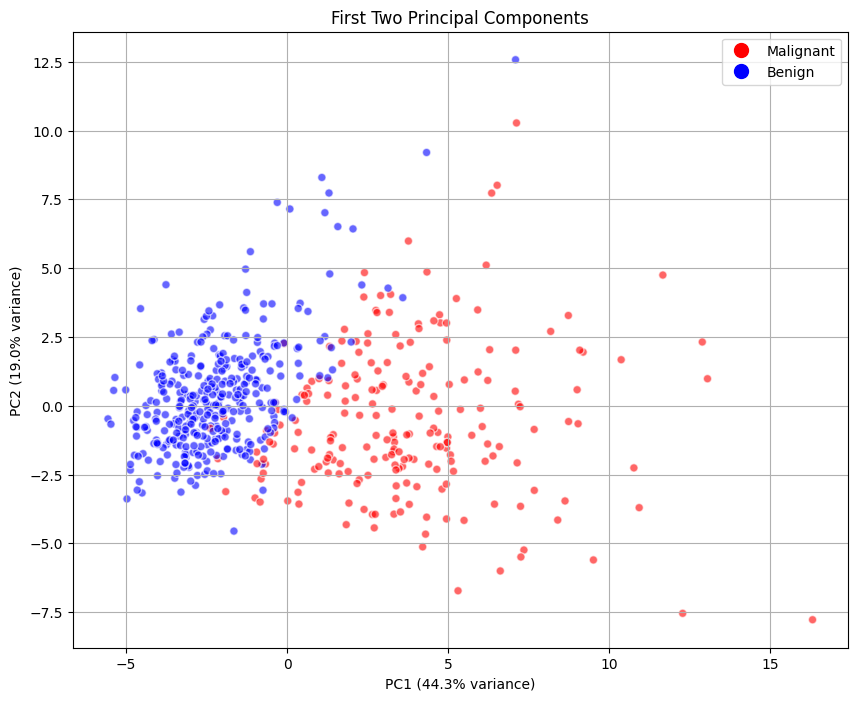

In [7]:
# Plot first two components
plt.figure(figsize=(10, 8))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, edgecolors='w')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('First Two Principal Components')
plt.grid(True)

# Add legend
import matplotlib.lines as mlines
malignant = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                         markersize=10, label='Malignant')
benign = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                      markersize=10, label='Benign')
plt.legend(handles=[malignant, benign])
plt.show()

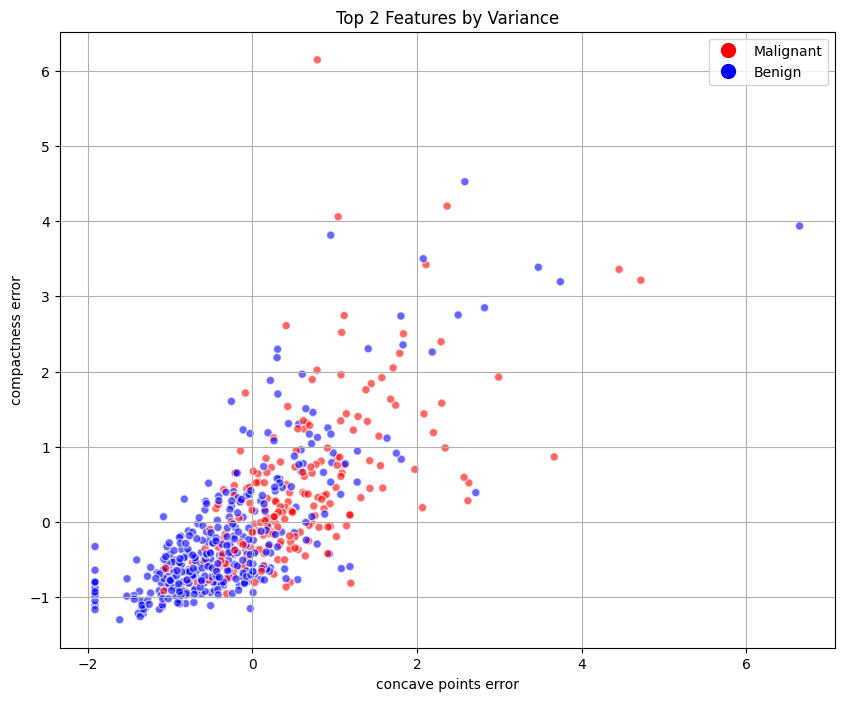

In [8]:
# Plot 2D of the raw features with highest variance
variances = np.var(X_scaled, axis=0)
top2_indices = np.argsort(variances)[-2:]

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, top2_indices[0]], X_scaled[:, top2_indices[1]], c=colors, alpha=0.6, edgecolors='w')
plt.xlabel(feature_names[top2_indices[0]])
plt.ylabel(feature_names[top2_indices[1]])
plt.title('Top 2 Features by Variance')
plt.grid(True)
plt.legend(handles=[malignant, benign])
plt.show()


In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Original features
clf_original = LogisticRegression(max_iter=10000)
clf_original.fit(X_train, y_train)
acc_original = accuracy_score(y_test, clf_original.predict(X_test))

# PCA features
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
clf_pca = LogisticRegression(max_iter=10000)
clf_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, clf_pca.predict(X_test_pca))

print(f"Original accuracy: {acc_original:.4f}")
print(f"PCA accuracy: {acc_pca:.4f}")
print(f"Number of features reduced from {X_train.shape[1]} to {X_train_pca.shape[1]}")

Original accuracy: 0.9825
PCA accuracy: 0.9825
Number of features reduced from 30 to 10


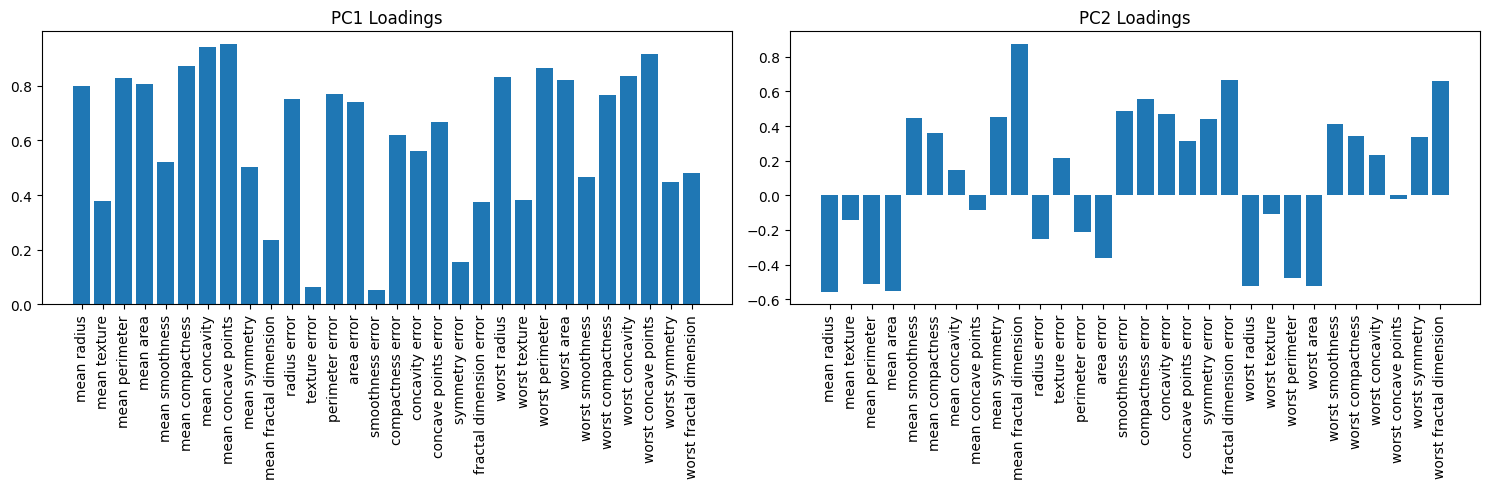

In [10]:
# Get feature importance
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot first two components
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(range(len(feature_names)), loadings[:, 0])
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('PC1 Loadings')

plt.subplot(1, 2, 2)
plt.bar(range(len(feature_names)), loadings[:, 1])
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('PC2 Loadings')

plt.tight_layout()
plt.show()